# Load the Data

In [1]:
import pandas as pd

# Load the dataset
file_path = 'data/Dataset .csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

# Data Inspection and Cleaning: 

In [8]:
import pandas as pd

# Load the dataset (assuming you have already loaded it)
# data = pd.read_csv('/path/to/your/file.csv')

# Display basic information about the dataset
print("Basic Information about the Dataset:")
print(data.info())

# Check for missing values
print("\nMissing Values in Each Column:")
missing_values = data.isnull().sum()
print(missing_values)






Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null

# Analysis 1: Percentage of Restaurants Offering Table Booking and Online Delivery

In [9]:
# Calculate the percentage of restaurants offering table booking
table_booking_count = data['Has Table booking'].value_counts()
percent_table_booking = (table_booking_count['Yes'] / len(data)) * 100

# Calculate the percentage of restaurants offering online delivery
online_delivery_count = data['Has Online delivery'].value_counts()
percent_online_delivery = (online_delivery_count['Yes'] / len(data)) * 100

print("Percentage of Restaurants with Table Booking:", percent_table_booking)
print("Percentage of Restaurants with Online Delivery:", percent_online_delivery)


Percentage of Restaurants with Table Booking: 12.124384881164275
Percentage of Restaurants with Online Delivery: 25.662234321013504


# Analysis 2: Compare Average Ratings of Restaurants With and Without Table Booking

In [10]:
# Calculate average ratings for restaurants with and without table booking
avg_rating_with_table_booking = data[data['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_table_booking = data[data['Has Table booking'] == 'No']['Aggregate rating'].mean()

print("Average Rating with Table Booking:", avg_rating_with_table_booking)
print("Average Rating without Table Booking:", avg_rating_without_table_booking)


Average Rating with Table Booking: 3.4419689119170984
Average Rating without Table Booking: 2.559358989634219


# Analysis 3: Online Delivery Availability in Different Price Ranges

In [11]:
# Analyze online delivery availability in different price ranges
online_delivery_by_price_range = data.groupby('Price range')['Has Online delivery'].value_counts(normalize=True) * 100

print(online_delivery_by_price_range)


Price range  Has Online delivery
1            No                     84.225923
             Yes                    15.774077
2            No                     58.689367
             Yes                    41.310633
3            No                     70.809659
             Yes                    29.190341
4            No                     90.955631
             Yes                     9.044369
Name: proportion, dtype: float64


# Bar Chart for Table Booking and Online Delivery

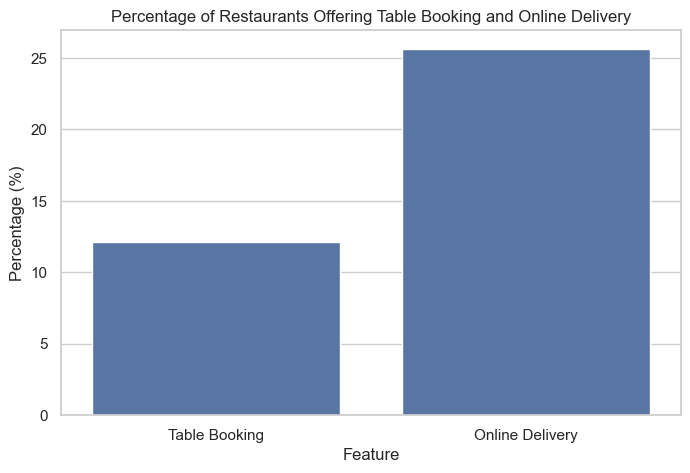

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for bar chart
features = ['Table Booking', 'Online Delivery']
percentages = [percent_table_booking, percent_online_delivery]
bar_data = pd.DataFrame({'Feature': features, 'Percentage': percentages})

# Create a bar chart
sns.set(style="whitegrid")  # Set the aesthetic style of the plots
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x='Feature', y='Percentage', data=bar_data)

# Add labels and title
plt.title('Percentage of Restaurants Offering Table Booking and Online Delivery')
plt.ylabel('Percentage (%)')
plt.xlabel('Feature')

# Show the plot
plt.show()


# Bar Chart Comparing Average Ratings

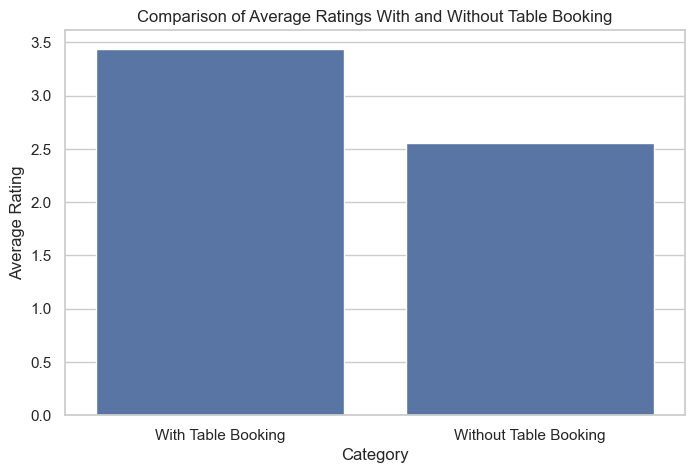

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for bar chart
categories = ['With Table Booking', 'Without Table Booking']
average_ratings = [avg_rating_with_table_booking, avg_rating_without_table_booking]
rating_data = pd.DataFrame({'Category': categories, 'Average Rating': average_ratings})

# Create a bar chart
sns.set(style="whitegrid")  # Set the aesthetic style of the plots
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x='Category', y='Average Rating', data=rating_data)

# Add labels and title
plt.title('Comparison of Average Ratings With and Without Table Booking')
plt.ylabel('Average Rating')
plt.xlabel('Category')

# Show the plot
plt.show()


# Bar Chart for Online Delivery Availability Across Price Ranges

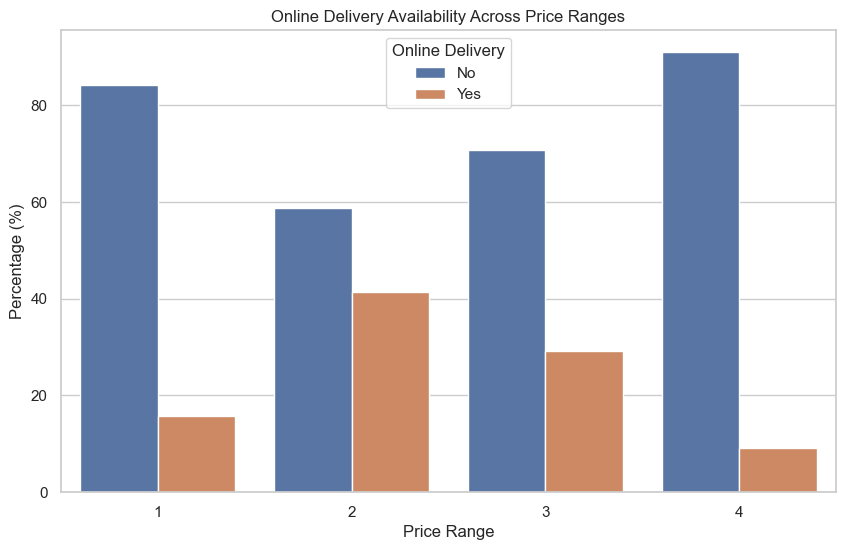

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your original DataFrame
# Calculate the percentage of online delivery availability in each price range
online_delivery_by_price_range = data.groupby('Price range')['Has Online delivery'].value_counts(normalize=True) * 100
online_delivery_by_price_range_df = online_delivery_by_price_range.reset_index(name='Percentage')
online_delivery_by_price_range_df.columns = ['Price Range', 'Online Delivery', 'Percentage']

# Now, create the bar chart
sns.set(style="whitegrid")  # Set the aesthetic style of the plots
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Price Range', y='Percentage', hue='Online Delivery', data=online_delivery_by_price_range_df)

# Add labels and title
plt.title('Online Delivery Availability Across Price Ranges')
plt.ylabel('Percentage (%)')
plt.xlabel('Price Range')

# Show the plot
plt.show()



# Trend analysis

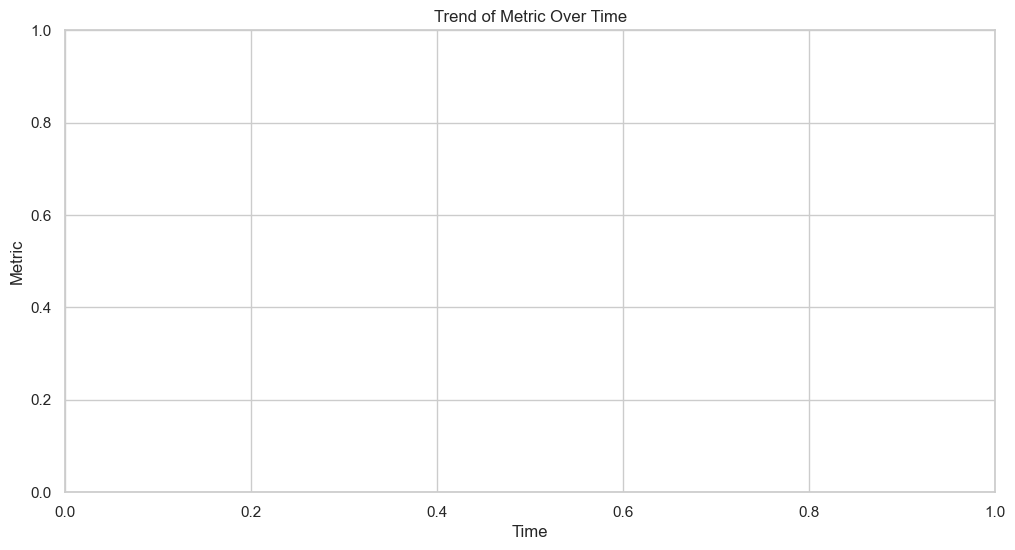

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Ensure the date/time column is in the correct datetime format
# Replace 'YourDateColumn' with your actual date or year column name
# data['YourDateColumn'] = pd.to_datetime(data['YourDateColumn'])

# Example: Analyzing the trend in a certain metric (e.g., average rating) over time
# Replace 'YourDateColumn' and 'RatingColumn' with your actual column names
# trend_data = data.groupby('YourDateColumn')['RatingColumn'].mean().reset_index()

# If your date/time column is a year or month, ensure it's sorted for the plot
# trend_data = trend_data.sort_values('YourDateColumn')

# Plotting the trend
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
# Replace 'YourDateColumn' and 'RatingColumn' with your actual column names
# sns.lineplot(x='YourDateColumn', y='RatingColumn', data=trend_data)
plt.title('Trend of Metric Over Time')
plt.xlabel('Time')
plt.ylabel('Metric')
plt.show()

# Print some of the trend data for preview
# print(trend_data.head())


# Correlation Analysis

Correlation Matrix:
                  Price range  Aggregate rating
Price range          1.000000          0.437944
Aggregate rating     0.437944          1.000000


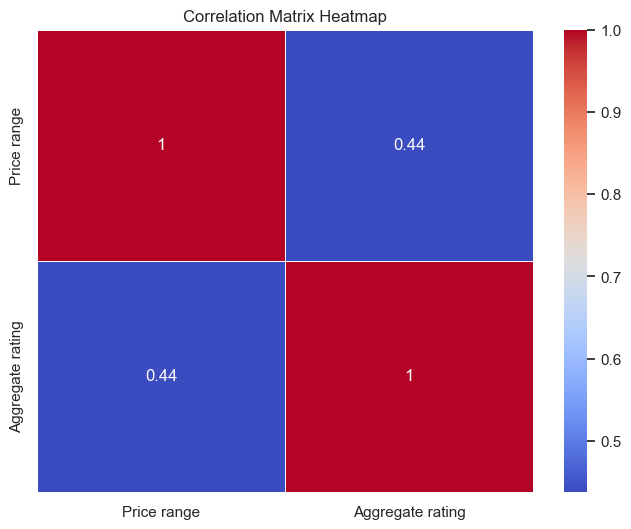

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it contains columns like 'Price range' and 'Aggregate rating'
# You can add more numerical columns to the analysis as needed

# Selecting only the numerical columns for correlation analysis
numerical_data = data[['Price range', 'Aggregate rating']]  # Add more numerical columns if needed

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Printing the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix using a heatmap
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Geographical Analysis

Geographical Analysis (Top Cities by Average Rating):
               City  Aggregate rating
0        Inner City          4.900000
1       Quezon City          4.800000
2       Makati City          4.650000
3        Pasig City          4.633333
4  Mandaluyong City          4.625000


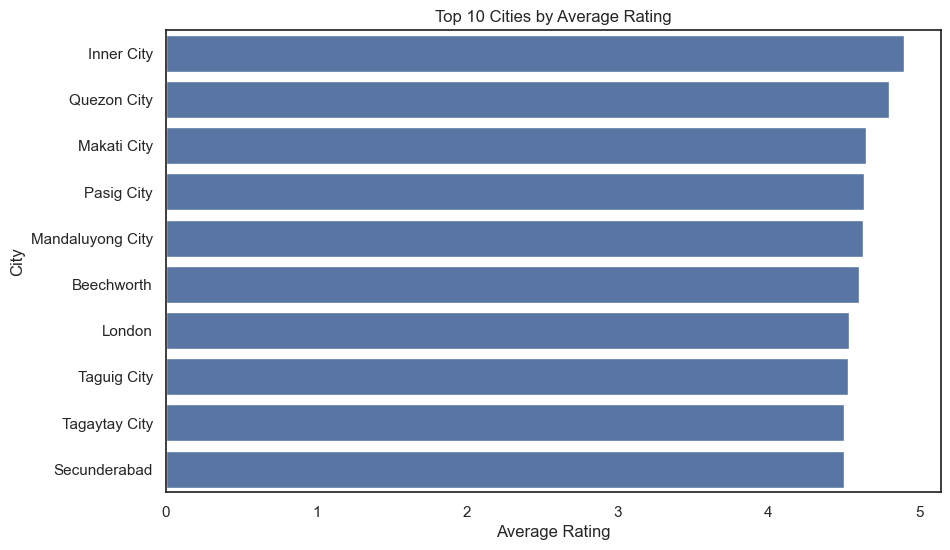

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it has columns like 'City' and 'Aggregate rating'
# You can replace these with the actual column names in your dataset

# Grouping the data by city or area and calculating a metric of interest (e.g., average rating)
# Replace 'City' and 'Aggregate rating' with your actual column names
geo_analysis = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).reset_index()

# Printing the top part of the analysis result for preview
print("Geographical Analysis (Top Cities by Average Rating):")
print(geo_analysis.head())

# Plotting the results - top 10 cities for example
# You can adjust the number as per your dataset
top_cities = geo_analysis.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Aggregate rating', y='City', data=top_cities)
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()


# Cuisine Analysis

Top Cuisines by Average Rating:
     Cuisine  Aggregate rating
0      Sunda          4.900000
1       Brek          4.700000
2  Taiwanese          4.650000
3      Ramen          4.500000
4    Dim Sum          4.466667


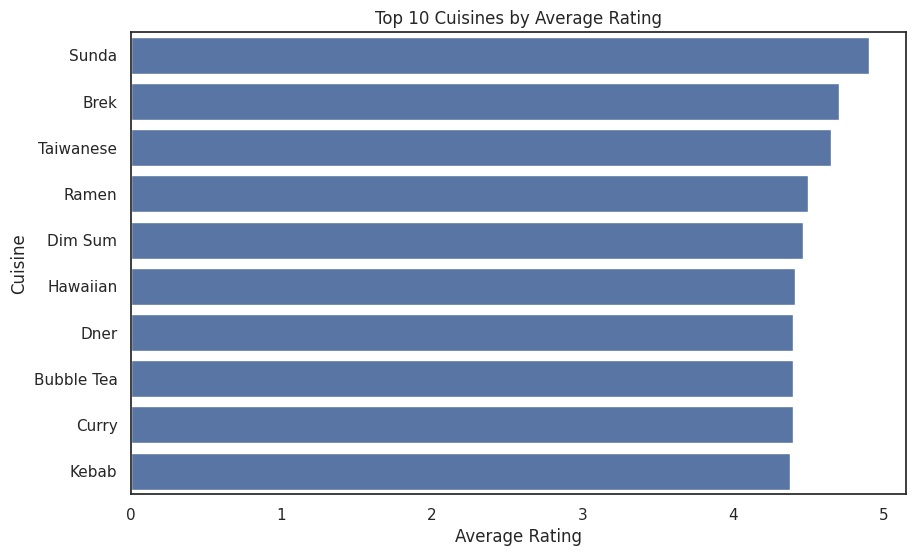

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Addressing the font issue in matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'  # Using a font that supports more characters

# Assuming 'data' is your DataFrame
# Load your dataset here if not already done
# data = pd.read_csv('path_to_your_dataset.csv')

# Preprocessing to remove non-standard characters in 'Cuisines'
# Adjust this if your column has a different name
data['Cuisines'] = data['Cuisines'].str.replace('[^a-zA-Z, ]', '', regex=True)

# Splitting the 'Cuisines' column (if multiple cuisines are listed in a single cell)
all_cuisines = data['Cuisines'].str.split(', ', expand=True).stack()

# Merging the split cuisines back with the main DataFrame to associate with other columns
cuisine_data = all_cuisines.reset_index(level=1, drop=True).to_frame('Cuisine').join(data[['Aggregate rating', 'Has Online delivery', 'Has Table booking']])

# Analyzing the average rating for each cuisine
avg_rating_by_cuisine = cuisine_data.groupby('Cuisine')['Aggregate rating'].mean().sort_values(ascending=False).reset_index()

# Printing the top cuisines by average rating
print("Top Cuisines by Average Rating:")
print(avg_rating_by_cuisine.head())

# Plotting the top 10 cuisines by average rating
top_cuisines = avg_rating_by_cuisine.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Aggregate rating', y='Cuisine', data=top_cuisines)
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()


# Customer Preferences

Average Rating Across All Restaurants: 2.67

Number of Top-Rated Restaurants (Rating >= 4.5): 301


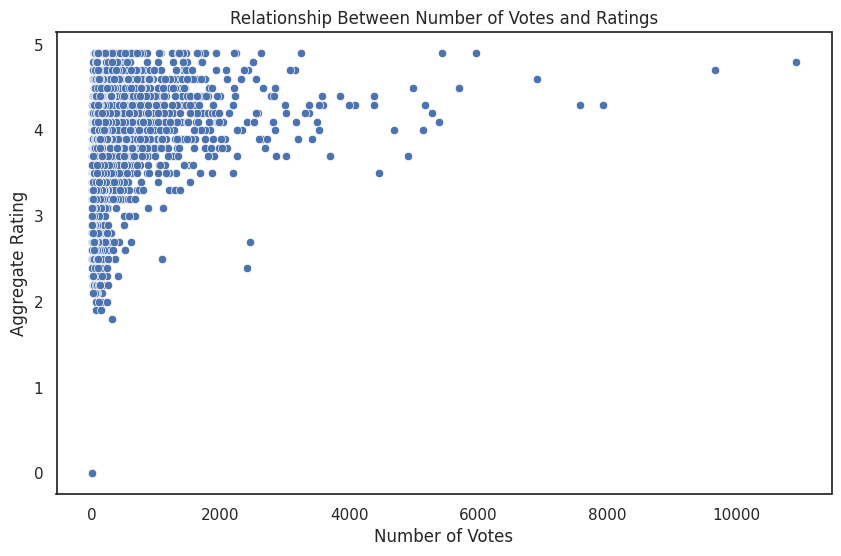

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Load your dataset here if not already done
# data = pd.read_csv('path_to_your_dataset.csv')

# Basic analysis of customer preferences
# 1. Calculate the average rating
average_rating = data['Aggregate rating'].mean()
print(f"Average Rating Across All Restaurants: {average_rating:.2f}")

# 2. Identify the top-rated restaurants (e.g., rating above 4.5 or top 5%)
top_threshold = 4.5  # or data['Aggregate rating'].quantile(0.95) for top 5%
top_rated_restaurants = data[data['Aggregate rating'] >= top_threshold]
print(f"\nNumber of Top-Rated Restaurants (Rating >= {top_threshold}): {len(top_rated_restaurants)}")

# 3. Analyze the relationship between number of votes and ratings
# This gives an idea of customer engagement and satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=data)
plt.title('Relationship Between Number of Votes and Ratings')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.show()

# Additional analysis can be performed based on reviews or specific comments if available in the dataset


# Custom Analysis

Average Rating and Number of Votes by Price Range:
   Price range  Aggregate rating       Votes
0            1          1.999887   44.597435
1            2          2.941054  147.607131
2            3          3.683381  443.860795
3            4          3.817918  368.595563


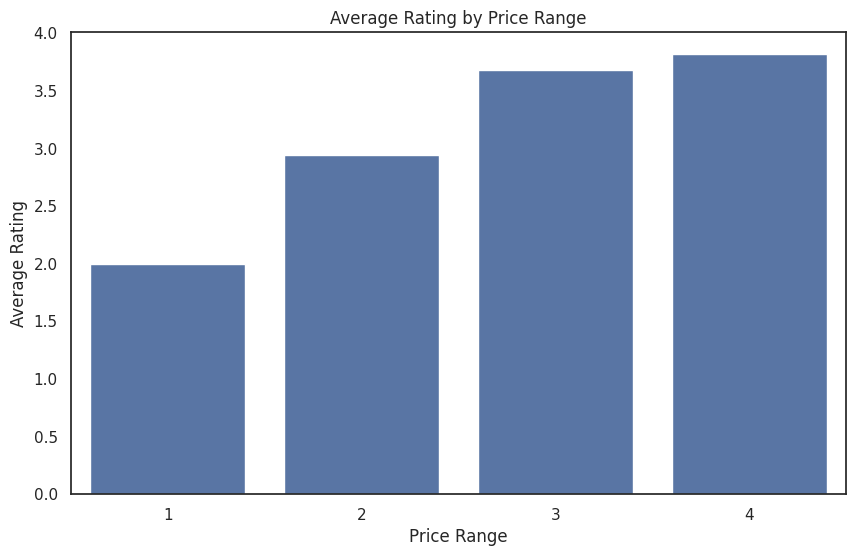

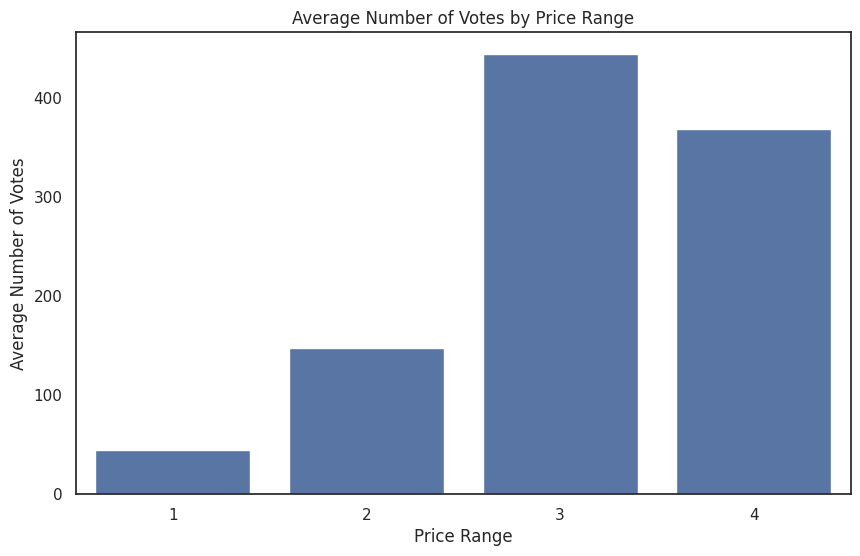

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Load your dataset here if not already done
# data = pd.read_csv('path_to_your_dataset.csv')

# Grouping by price range and calculating average rating and average number of votes
price_satisfaction = data.groupby('Price range').agg({'Aggregate rating': 'mean', 'Votes': 'mean'}).reset_index()

# Printing the result
print("Average Rating and Number of Votes by Price Range:")
print(price_satisfaction)

# Plotting the results
# Plot for Average Ratings by Price Range
plt.figure(figsize=(10, 6))
sns.barplot(x='Price range', y='Aggregate rating', data=price_satisfaction)
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()

# Plot for Average Number of Votes by Price Range
plt.figure(figsize=(10, 6))
sns.barplot(x='Price range', y='Votes', data=price_satisfaction)
plt.title('Average Number of Votes by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Number of Votes')
plt.show()
